In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.drop('id', axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Jaki procent to nulle? 

In [6]:
data.isnull().sum()/len(data) * 10

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.393346
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [7]:
data[['gender', 'age', 'bmi']].groupby(['gender', 'age'])['bmi'].mean()

gender  age  
Female  0.08     14.100000
        0.32     17.266667
        0.40     17.400000
        0.48     16.100000
        0.56     18.300000
                   ...    
Male    79.00    27.681818
        80.00    29.210714
        81.00    27.677273
        82.00    27.943478
Other   26.00    22.400000
Name: bmi, Length: 206, dtype: float64

In [8]:
def calculate_mean_bmi(age, sex):
    group = data[(data['age'] == age) & (data['gender'] == sex)]
    mean_bmi = group['bmi'].median()
    return mean_bmi

for idx, row in data.iterrows():
    if pd.isnull(row['bmi']):
        age = row['age']
        sex = row['gender']
        mean_bmi = calculate_mean_bmi(age, sex)
        data.at[idx, 'bmi'] = mean_bmi


C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [10]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  1
smoking_status       0
stroke               0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.234981,22.606948,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.154161,45.285620,55.12,77.26,91.89,114.09,271.74
bmi,5109.0,28.883255,7.727254,10.30,23.70,28.20,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


# Sprawdzenie czy dane są zbilansowane 

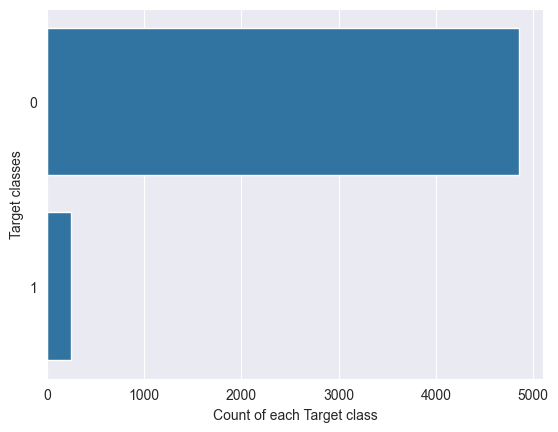

In [13]:
sns.countplot(y=data['stroke'] ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

## Analiza danych, cech 

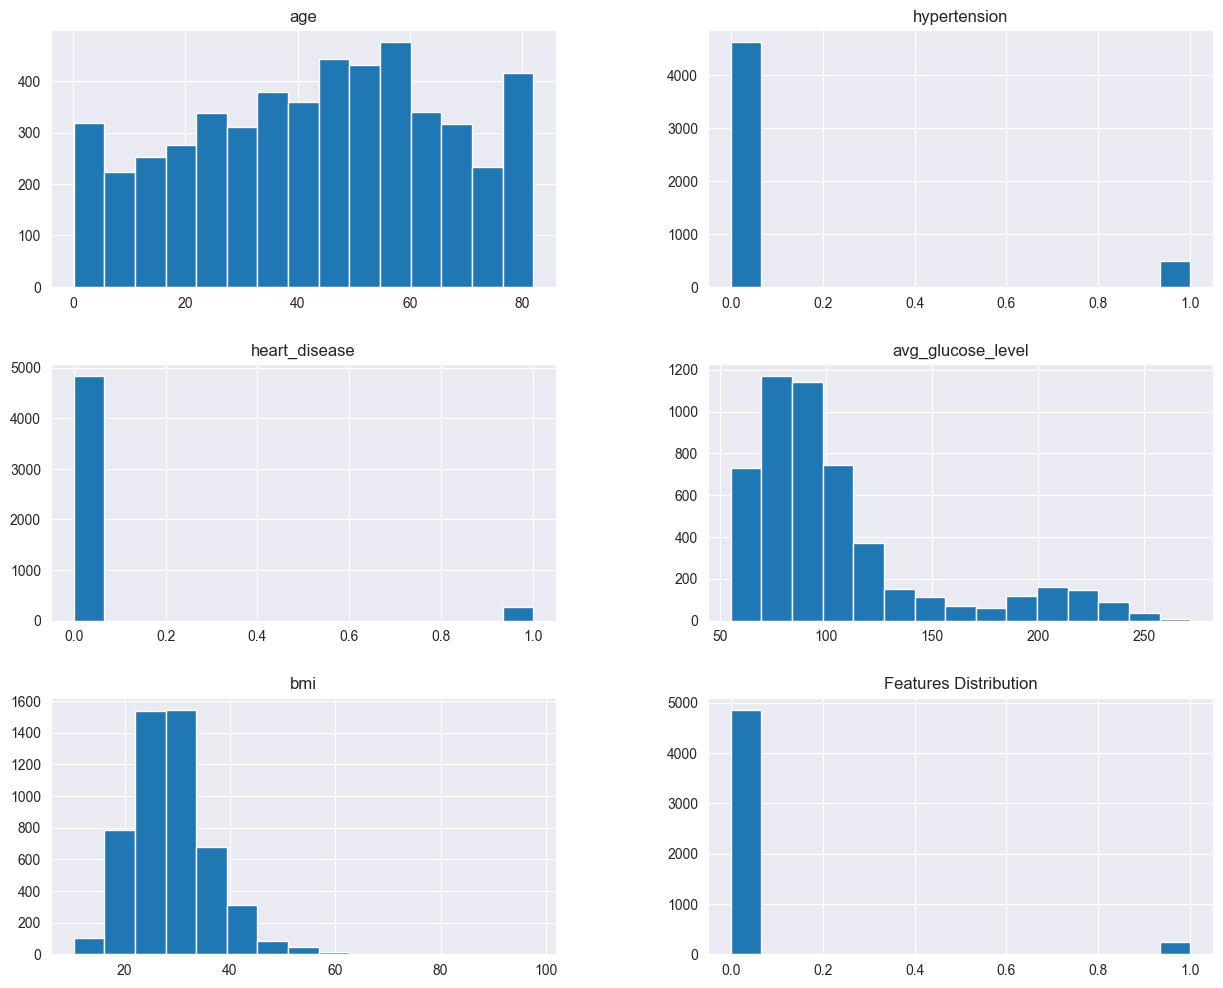

In [14]:
data.hist(figsize=(15,12),bins = 15)
plt.show()

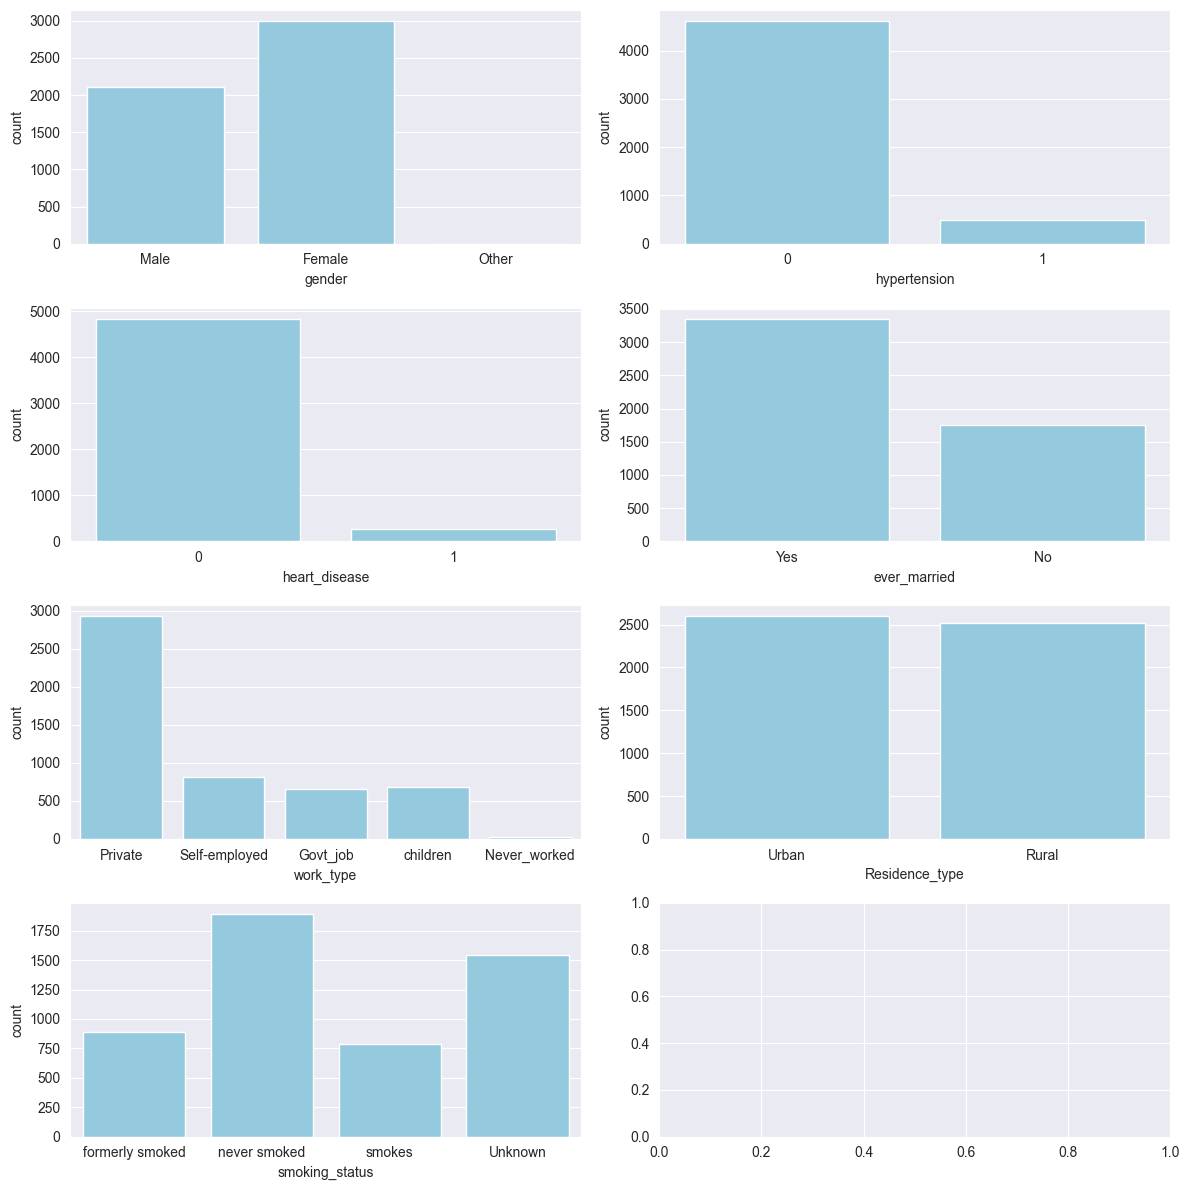

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
sns.countplot(ax = axes[0,0], x='gender', data=data, color='skyblue')
sns.countplot(ax = axes[0,1], x='hypertension', data=data, color='skyblue')
sns.countplot(ax = axes[1,0], x='heart_disease', data=data, color='skyblue')
sns.countplot(ax = axes[1,1], x='ever_married', data=data, color='skyblue')
sns.countplot(ax = axes[2,0], x='work_type', data=data, color='skyblue')
sns.countplot(ax = axes[2,1], x='Residence_type', data=data, color='skyblue')
sns.countplot(ax = axes[3,0], x='smoking_status', data=data, color='skyblue')
plt.tight_layout()
plt.show()

<Axes: xlabel='stroke', ylabel='bmi'>

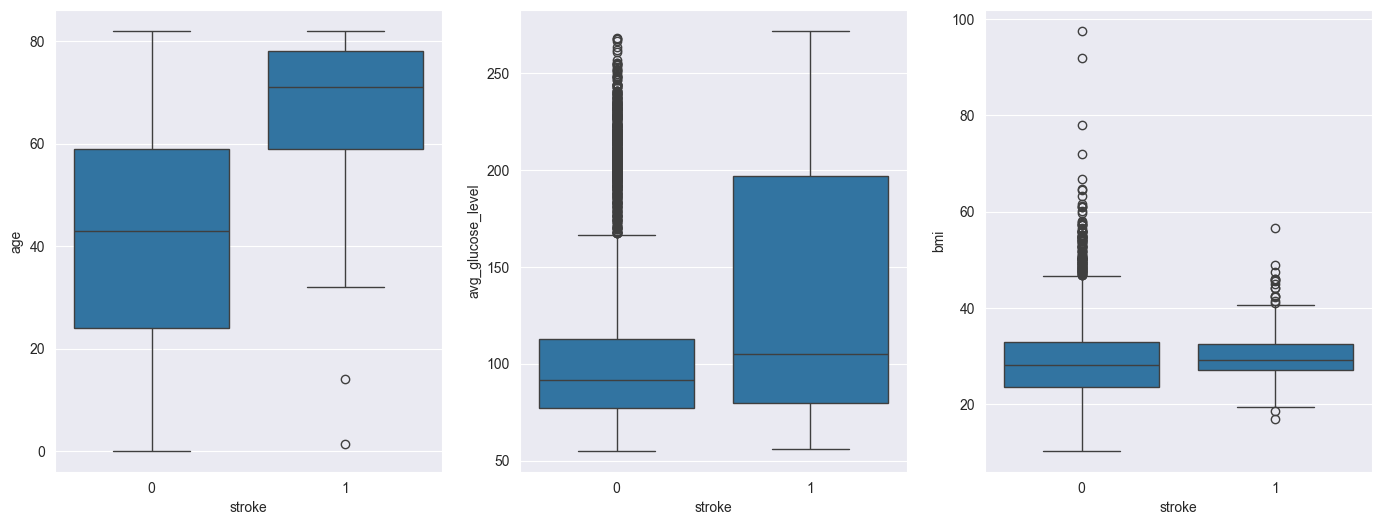

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(17,6))
sns.boxplot(ax = axes[0], data=data, x="stroke", y="age")
sns.boxplot(ax = axes[1], data=data, x="stroke", y="avg_glucose_level")
sns.boxplot(ax = axes[2], data=data, x="stroke", y="bmi")


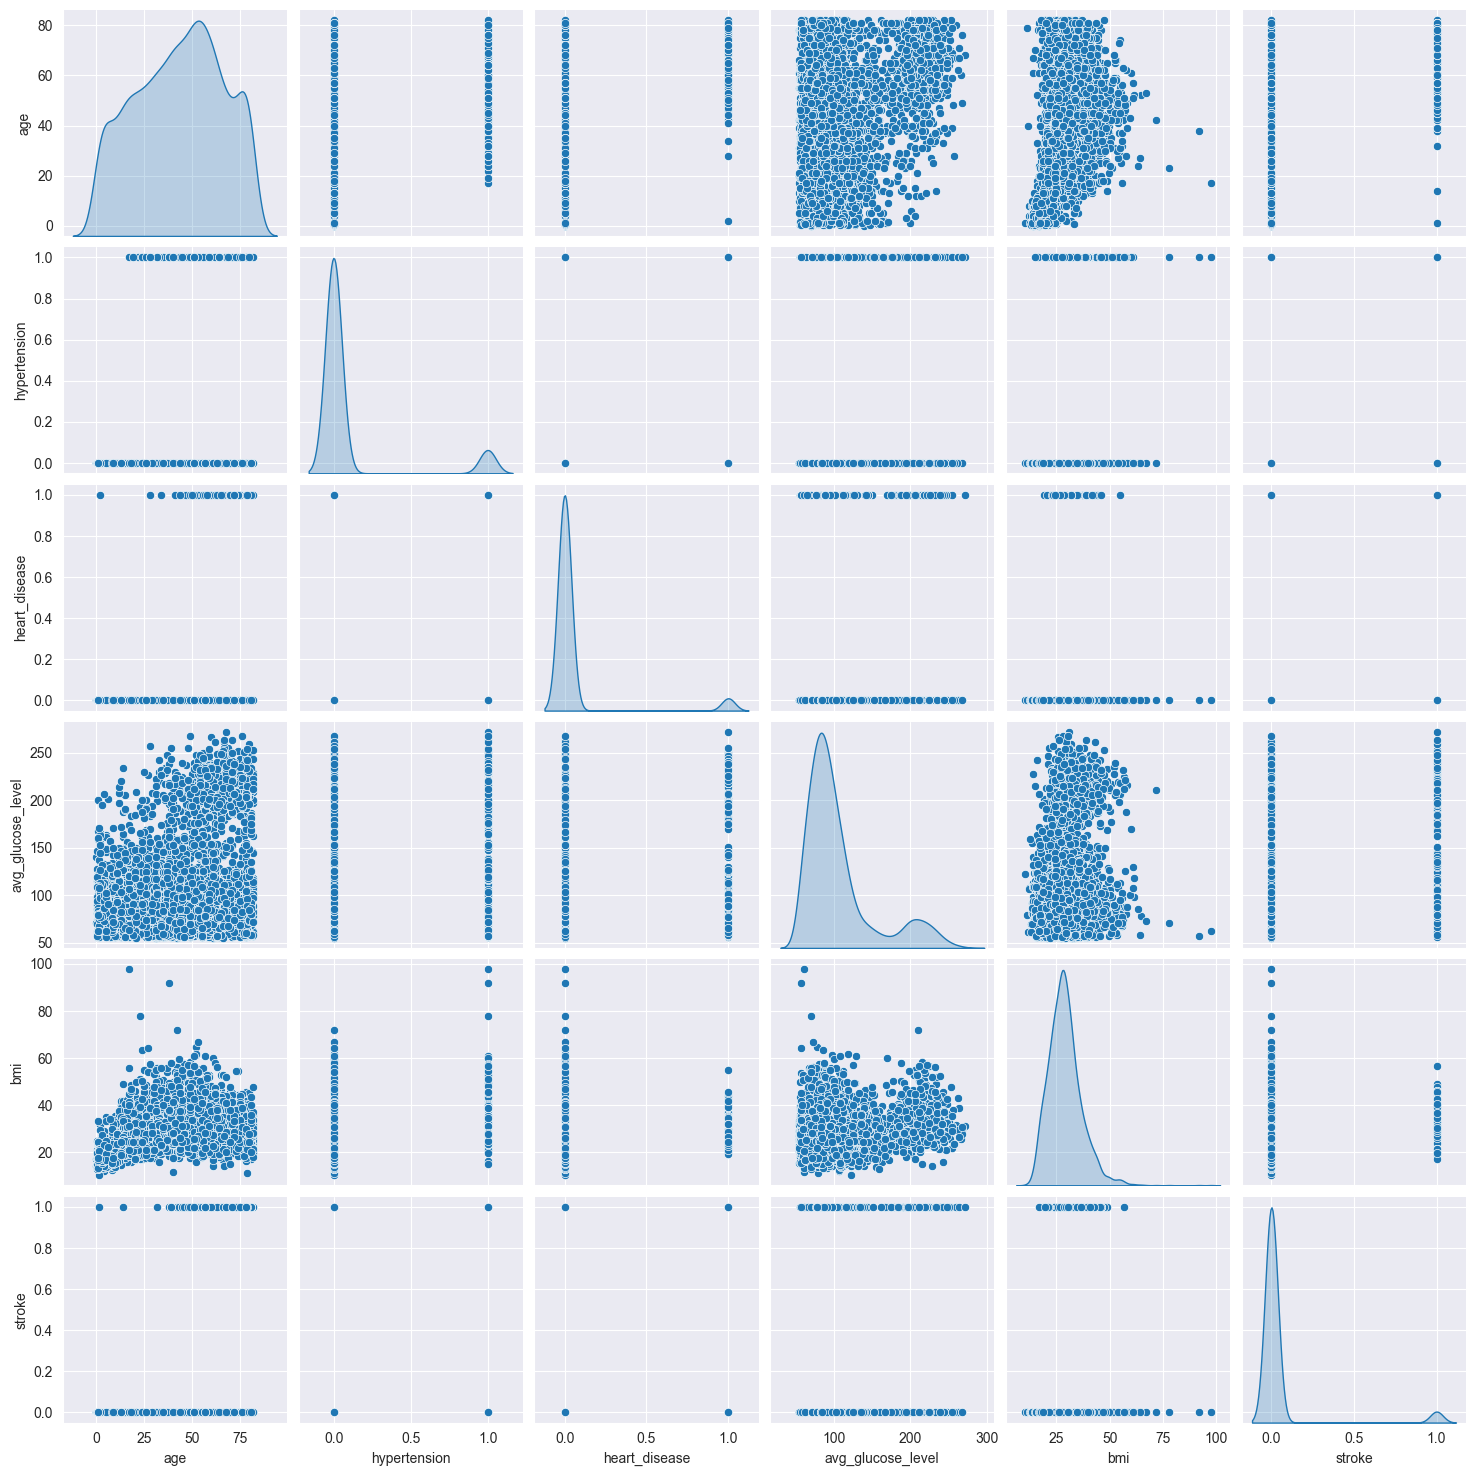

In [17]:
sns.pairplot(data, diag_kind='kde')   

## Get dummies - praca z danymi kategorialnymi

In [18]:
data['ever_married'] = data['ever_married'].apply(lambda x: 1 if x =='Yes' else 0)
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
data_new = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)
y = data_new.pop('stroke')
data_new['stroke'] = y 
data_new

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,1,0,0,1
1,61.0,0,0,1,202.21,29.3,0,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,1
3,49.0,0,0,1,171.23,34.4,0,0,0,1,0,0,1,0,0,1,1
4,79.0,1,0,1,174.12,24.0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,27.6,0,0,0,1,0,0,1,0,1,0,0
5106,81.0,0,0,1,125.20,40.0,0,0,0,0,1,0,1,0,1,0,0
5107,35.0,0,0,1,82.99,30.6,0,0,0,0,1,0,0,0,1,0,0
5108,51.0,0,0,1,166.29,25.6,1,0,0,1,0,0,0,1,0,0,0


## Analiza korelacji, usuwanie zbędnych kolumn, łączenie kolumn skorelowanych

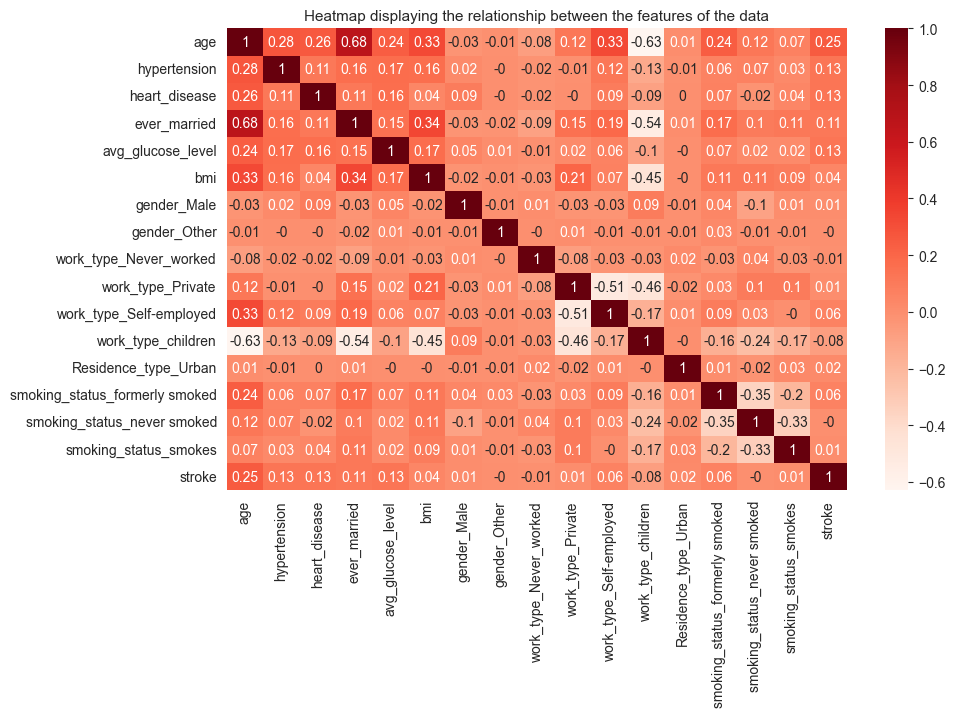

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data_new.corr().round(2), cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=11)
plt.show()

In [20]:
significant_features = data_new.corr()['stroke'].abs().sort_values(ascending=False)
significant_features = significant_features[significant_features > 0.1].index.tolist()
print(significant_features)


['stroke', 'age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'ever_married']


In [21]:
highly_correlated_features = set()
correlation_matrix = data_new.corr().abs()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.6:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
print("Highly correlated features:", highly_correlated_features)


Highly correlated features: {'work_type_children', 'ever_married'}


In [22]:
data_new = data_new[significant_features]

In [23]:
data_new

,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
0,1,67.0,1,228.69,0,1
1,1,61.0,0,202.21,0,1
2,1,80.0,1,105.92,0,1
3,1,49.0,0,171.23,0,1
4,1,79.0,0,174.12,1,1
...,...,...,...,...,...,...
5105,0,80.0,0,83.75,1,1
5106,0,81.0,0,125.20,0,1
5107,0,35.0,0,82.99,0,1
5108,0,51.0,0,166.29,0,1


## Podział danych i standaryzacja

In [24]:
X = data_new.iloc[:,1:]
y = data_new.iloc[:, 0]

In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
col_to_stand = ['age', 'avg_glucose_level']
scaler = StandardScaler()
X_test[col_to_stand] = scaler.fit_transform(X_test[col_to_stand])
X_train[col_to_stand] = scaler.fit_transform(X_train[col_to_stand])
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
y_train = y_train.reshape(-1, 1)


In [27]:
from multi_layer_perc import *
from sklearn import metrics

mlp = MLP(sigmoid, sigmoid_derivative, input_layer=5, hidden_layer=7, output_layer=1)
mlp.train(X_train, y_train)
y_pred = mlp.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)


C:\Users\HP\PycharmProjects\BigData\multi_layer_perc.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-y))
C:\Users\HP\PycharmProjects\BigData\multi_layer_perc.py:39: RuntimeWarning: divide by zero encountered in log
  return -(np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / len(y))
C:\Users\HP\PycharmProjects\BigData\multi_layer_perc.py:39: RuntimeWarning: invalid value encountered in multiply
  return -(np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / len(y))


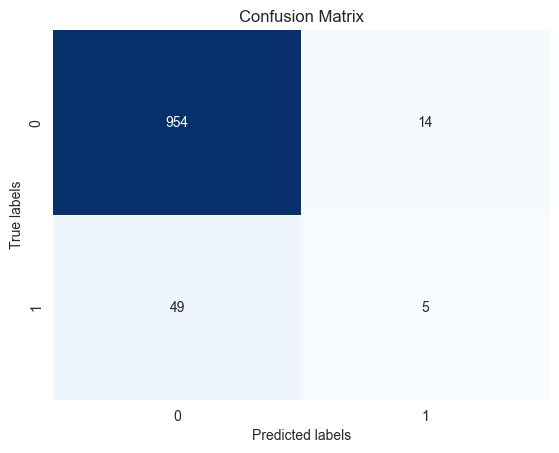

In [31]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Wyświetlenie wyników
print("Precyzja (Precision):", precision) # TP/TP+FP = 5/5+14
print("Pełność (Recall):", recall) # TP/TP+FN = 5/49+5
print("Dokładność (Accuracy):", accuracy)

Precyzja (Precision): 0.2631578947368421
Pełność (Recall): 0.09259259259259259
Dokładność (Accuracy): 0.9383561643835616


Tak dobra dokładność nie powinna dziwić, ponieważ zbiór jest niezrównoważony i naturalnie więcej osób nie będzie miec zawału, natomiast nas interesuje wydobycie informacji o możliwie jak największej ilości osób, które faktycznie są zagrożone możliwością udaru, a więc powinna interesować nas pełność, która u nas niestety jest dość mała. 

## Ponieważ dane są niezrównoważone można zrobić ... 